# EXP2 EDA ON TABULAR DATA

In [10]:
import pandas as pd
df=pd.read_csv('Dataset/Diabetes_Missing.csv')

In [11]:
df.head()

Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0         6    148.0          72.0       35.0            NaN  33.6   
1         1     85.0          66.0       29.0            NaN  26.6   
2         8    183.0          64.0        NaN            NaN  23.3   
3         1     89.0          66.0       23.0           94.0  28.1   
4         0    137.0          40.0       35.0          168.0  43.1   

   Diabetes_Pedigree  Age  Class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [13]:
df.describe()

Pregnant     Glucose  Diastolic_BP   Skin_Fold  Serum_Insulin  \
count  768.000000  763.000000    733.000000  541.000000     394.000000   
mean     3.845052  121.686763     72.405184   29.153420     155.548223   
std      3.369578   30.535641     12.382158   10.476982     118.775855   
min      0.000000   44.000000     24.000000    7.000000      14.000000   
25%      1.000000   99.000000     64.000000   22.000000      76.250000   
50%      3.000000  117.000000     72.000000   29.000000     125.000000   
75%      6.000000  141.000000     80.000000   36.000000     190.000000   
max     17.000000  199.000000    122.000000   99.000000     846.000000   

              BMI  Diabetes_Pedigree         Age       Class  
count  757.000000         768.000000  768.000000  768.000000  
mean    32.457464           0.471876   33.240885    0.348958  
std      6.924988           0.331329   11.760232    0.476951  
min     18.200000           0.078000   21.000000    0.000000  
25%     27.500000           0.243750   24.000000    0.000000  
50%     32.300000           0.372500   29.000000    0.000000  
75%     36.600000           0.626250   41.000000    1.000000  
max     67.100000           2.420000   81.000000    1.000000

In [14]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

<Axes: >

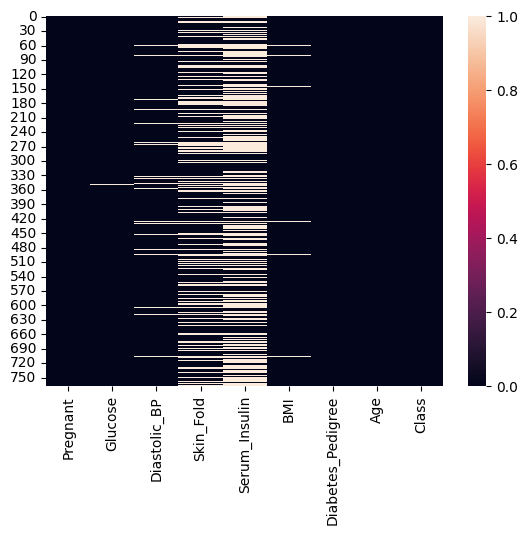

In [15]:
import seaborn as sns
sns.heatmap(df.isnull())

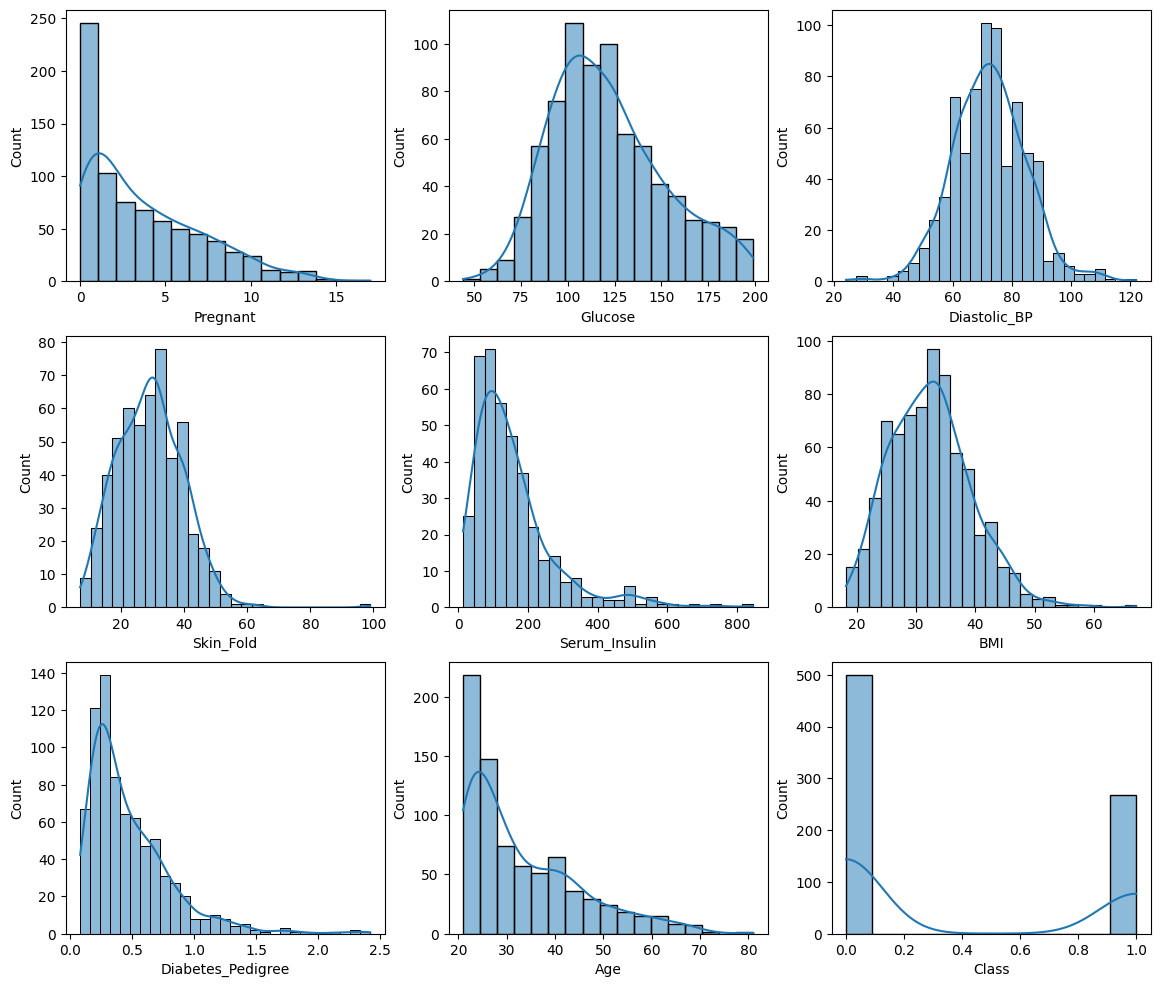

In [16]:
import matplotlib.pyplot as plt
cols=df.columns
plt.figure(figsize=(14,12))
for index,col in enumerate(cols):
    plt.subplot(3,3,index+1)
    sns.histplot(df[col],kde=True)

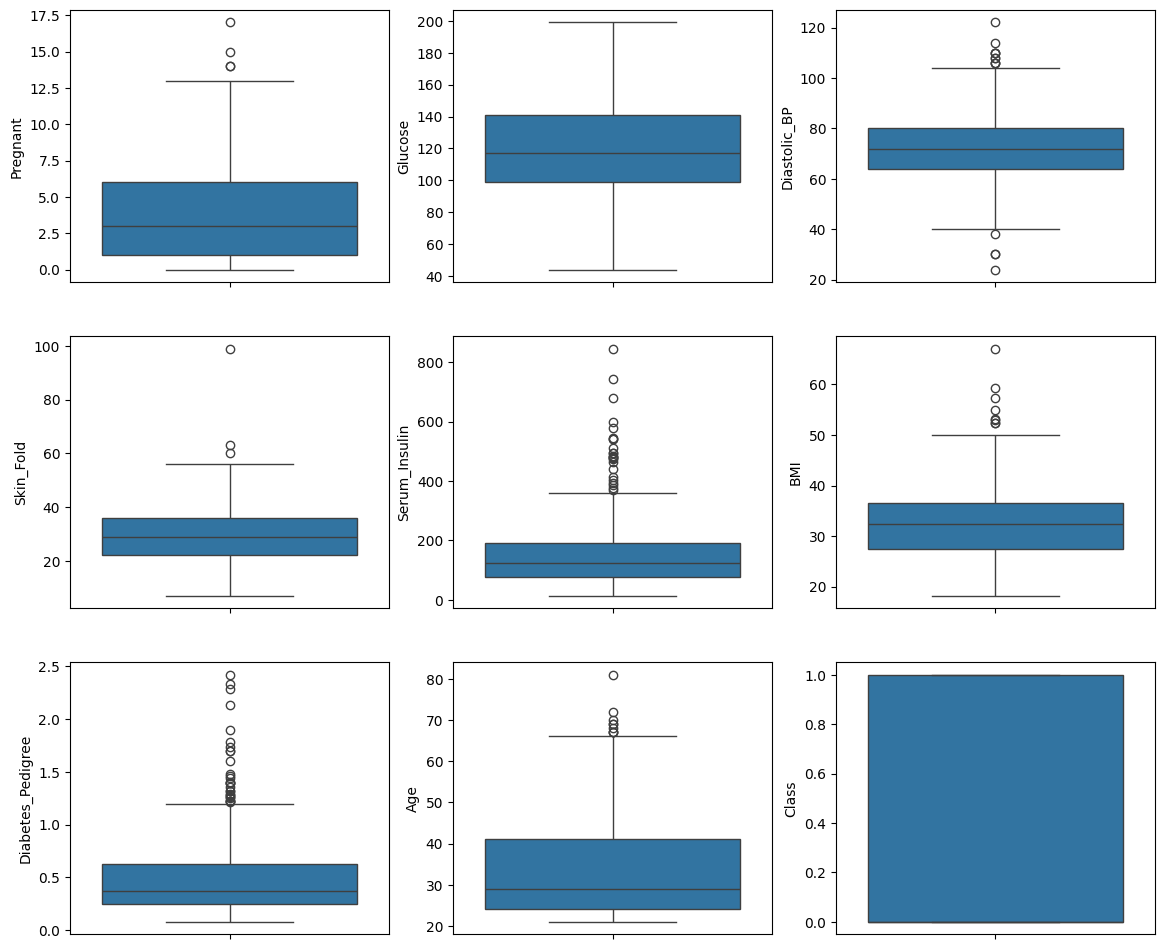

In [17]:
plt.figure(figsize=(14,12))
for index,col in enumerate(cols):
    plt.subplot(3,3,index+1)
    sns.boxplot(df[col])

<Axes: >

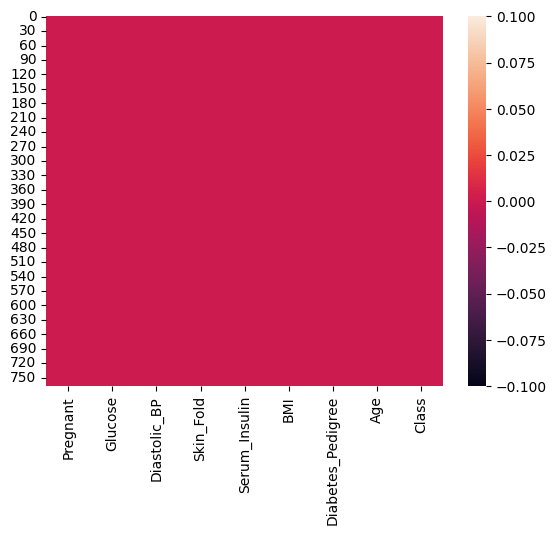

In [18]:
for col in cols:
    df.fillna(df[col].mean(),inplace=True)
sns.heatmap(df.isnull())

In [22]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

outliers=((df<lb)|(df>ub))
#print(df[outliers.any(axis=1)]) #This prints only the rows that contain at least one outlier.
df_no_outliers = df[~outliers.any(axis=1)] #it keeps only rows with no outliers.

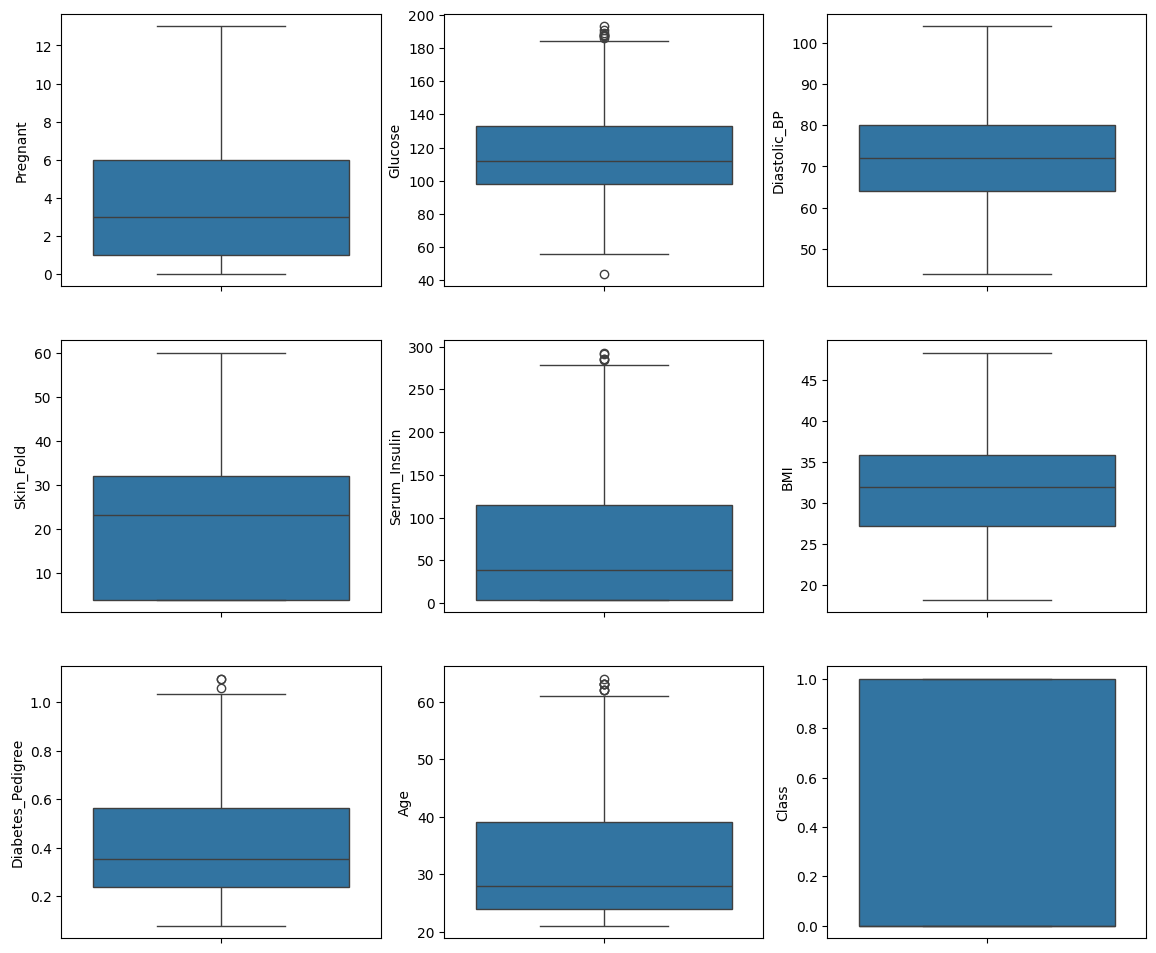

In [23]:
plt.figure(figsize=(14,12))
for index,col in enumerate(cols):
    plt.subplot(3,3,index+1)
    sns.boxplot(df_no_outliers[col])

([<matplotlib.patches.Wedge at 0x27439294280>,
 [Text(-0.6128150593327687, 0.9134865642443656, '0'),
  Text(0.6128150593327683, -0.9134865642443659, '1')])

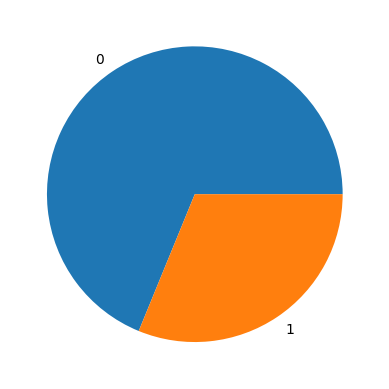

In [24]:
plt.pie(df['Class'].value_counts(),labels=['0','1'])

Index(['Pregnant', 'Glucose', 'Serum_Insulin', 'BMI', 'Age'], dtype='object')


<Axes: >

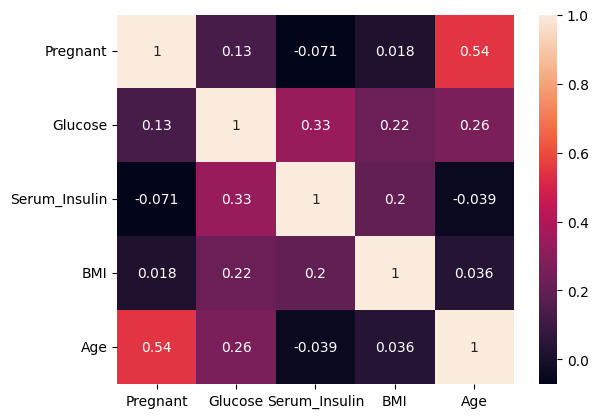

In [14]:
from sklearn.feature_selection import SelectKBest,chi2,
selector=SelectKBest(chi2,k=5)
X=df.drop('Class',axis=1)
y=df['Class']
selector.fit_transform(X,y)

select_feat=X.columns[selector.get_support()]
print(select_feat)
corr=df[select_feat].corr()
sns.heatmap(corr,annot=True)

EXP2 EDA ON IMAGE

<BarContainer object of 2 artists>

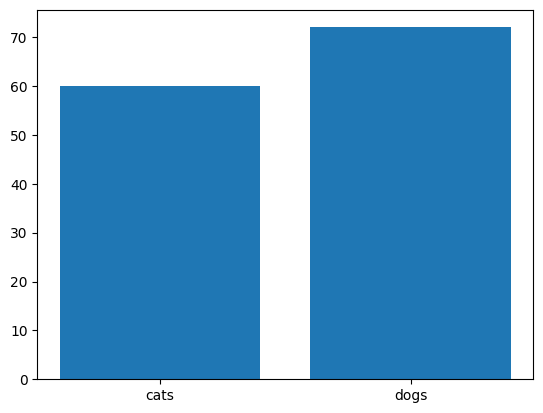

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

dataset_path='Dataset/cats_dogs'
classes=os.listdir(dataset_path)

img_cnts={}
img_shapes=[]
all_pixels=[] #for pixel level distribution check
for label in classes:
    label_dir=os.path.join(dataset_path,label)
    imgs=os.listdir(label_dir)
    img_cnts[label]=len(imgs)

    for img_file in imgs:
        img_path=os.path.join(label_dir,img_file)
        image=cv2.imread(img_path)
        if image is not None:
            img_shapes.append(image.shape)
            all_pixels.append(image.flatten())
plt.bar(img_cnts.keys(),img_cnts.values())


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 132.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  ,
        3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 ]),
 <BarContainer object of 20 artists>)

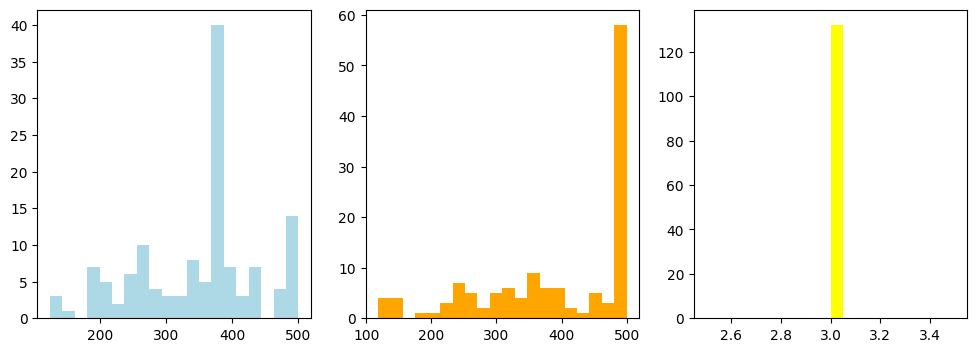

In [2]:
heights=[s[0] for s in img_shapes]
widths=[s[1] for s in img_shapes]
channels=[s[2] for s in img_shapes]

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(heights,bins=20,color='lightblue')

plt.subplot(1,3,2)
plt.hist(widths,bins=20,color='orange')

plt.subplot(1,3,3)
plt.hist(channels,bins=20,color='yellow')

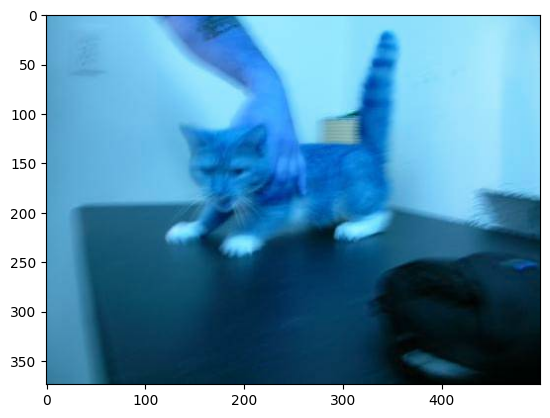

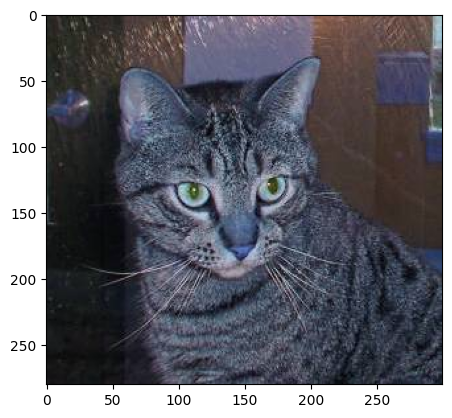

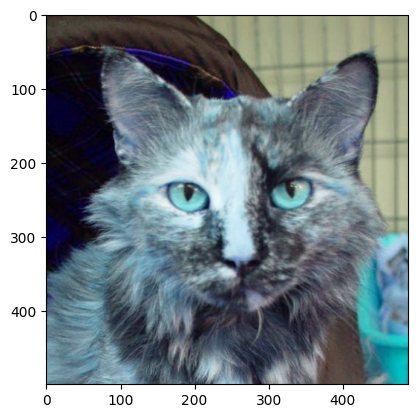

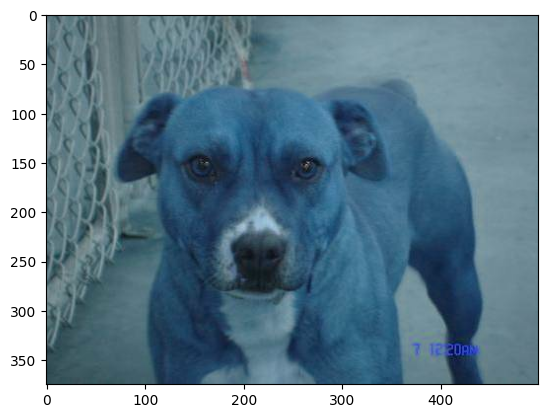

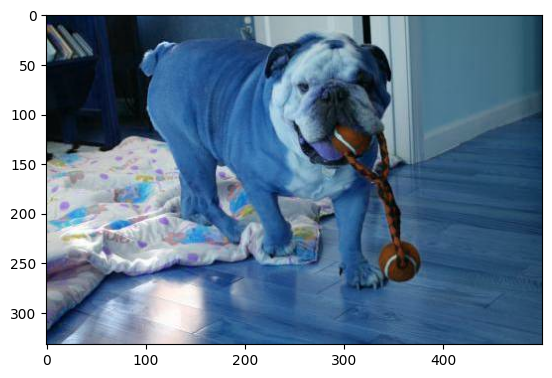

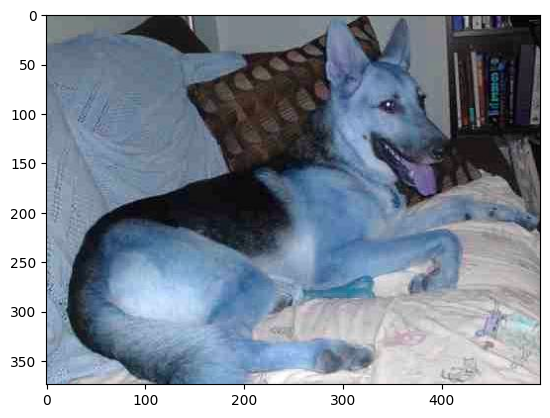

In [3]:
#First 3 Dog and Cat Images
for label in classes:
    label_dir=os.path.join(dataset_path,label)
    imgs=os.listdir(label_dir)
    img_cnts[label]=len(imgs)

    for img_file in imgs[:3]:
        img_path=os.path.join(label_dir,img_file)
        image=cv2.imread(img_path)
        if image is not None:
            plt.imshow(image)
            plt.show()


In [4]:
all_pixels=np.concatenate(all_pixels)
all_pixels

array([ 87, 164, 203, ..., 186, 158, 134], dtype=uint8)

(array([1669233., 2903231., 3397064., 3253448., 3418537., 3324097.,
        3427475., 3339452., 3718186., 3808348., 3768587., 3550880.,
        3659064., 3004065., 2275883., 1734391., 1754574., 1712755.,
        1346374., 1957912.]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

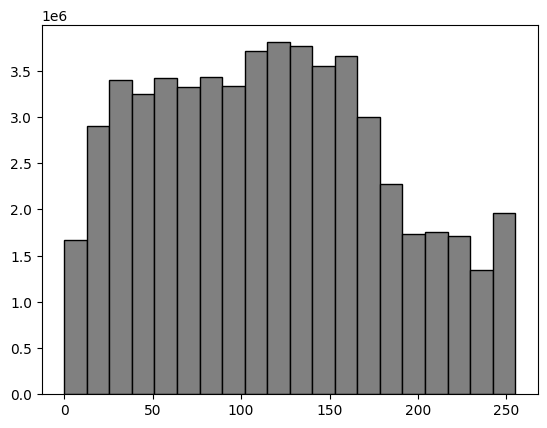

In [7]:
plt.hist(all_pixels,bins=20,color='gray',edgecolor='black')

In [9]:
#Stats of pixel values
print("Pixel Value Summary:")
print("Min:", np.min(all_pixels))
print("Max:", np.max(all_pixels))
print("Mean:", np.mean(all_pixels))
print("Std Dev:", np.std(all_pixels))

Pixel Value Summary:
Min: 0
Max: 255
Mean: 116.7607045060466
Std Dev: 65.6210385103431


EDA ON TEXT DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\SEM6\XAI_LAB_REQ\xai_env\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     D:\SEM6\XAI_LAB_REQ\xai_env\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('Dataset/twitter_training.csv', encoding='latin-1')  # adjust path
df.columns=['Tweet ID','entity','sentiment','Tweet content']
df.head()

Tweet ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet content  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

In [4]:
df['sentiment'].value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64

In [5]:
df = df[['sentiment', 'Tweet content']]  # Keep only necessary columns
df.columns = ['sentiment', 'Tweet content']

In [6]:
df['Length']=df['Tweet content'].str.len()


In [7]:
def word_cnt(tweet):
    words=str(tweet).split()
    return len(words)
df['word_cnt']=df['Tweet content'].apply(word_cnt)


In [8]:
df.head()

sentiment                                      Tweet content  Length  \
0  Positive  I am coming to the borders and I will kill you...    51.0   
1  Positive  im getting on borderlands and i will kill you ...    50.0   
2  Positive  im coming on borderlands and i will murder you...    51.0   
3  Positive  im getting on borderlands 2 and i will murder ...    57.0   
4  Positive  im getting into borderlands and i can murder y...    53.0   

   word_cnt  
0        12  
1        10  
2        10  
3        12  
4        10

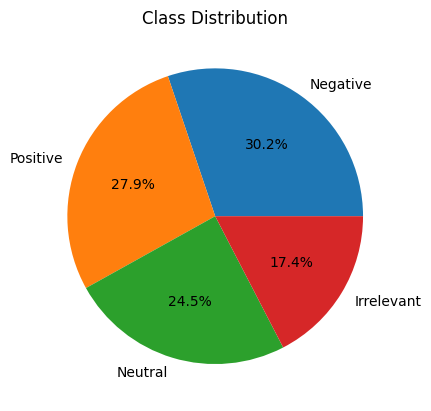

In [9]:
plt.pie(df['sentiment'].value_counts(), labels=[ 'Negative','Positive','Neutral','Irrelevant'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [10]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [29]:
def preprocess(text):
    # Lowercase
    text=str(text)
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # Lemmatize + Stem
    tokens = [stemmer.stem(lemmatizer.lemmatize(t)) for t in tokens]
    return ' '.join(tokens)

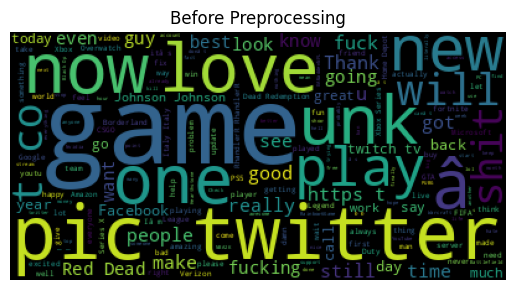

In [42]:
wc = WordCloud().generate(
    ' '.join(df['Tweet content'].astype(str))
)
plt.imshow(wc)
plt.title('Before Preprocessing')
plt.axis('off')
plt.show()

In [43]:
df['clean_text'] = df['Tweet content'][:50].apply(preprocess)

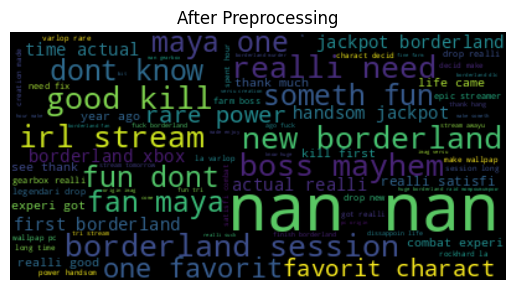

In [39]:
wc = WordCloud().generate(' '.join(df['clean_text'].astype(str)))
plt.imshow(wc, interpolation='bilinear')
plt.title('After Preprocessing')
plt.axis('off')
plt.show()

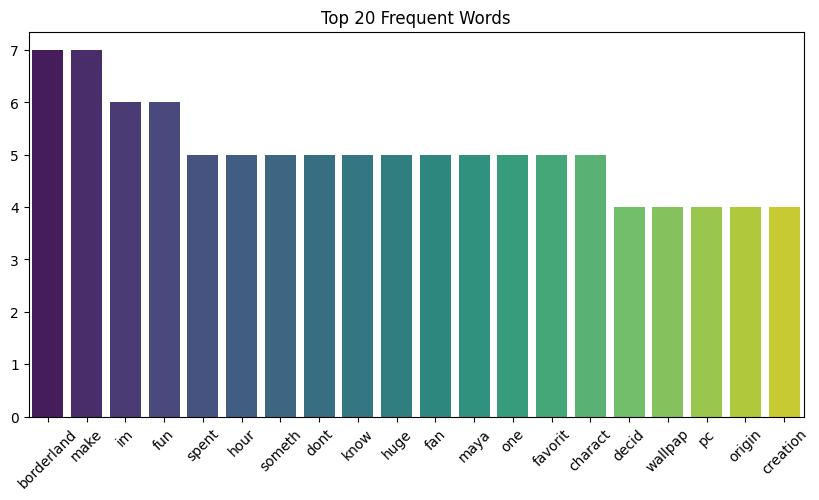

In [44]:
from collections import Counter
words = ' '.join(df['clean_text'][:10]).split()
word_freq = Counter(words).most_common(20)

words, counts = zip(*word_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 20 Frequent Words")
plt.xticks(rotation=45)
plt.show()

In [48]:
print(word_freq)

[('game', 10890), ('play', 6959), ('get', 5647), ('like', 5207), ('fuck', 4357), ('go', 4088), ('2', 4073), ('love', 3865), ('im', 3827), ('one', 3713), ('good', 3587), ('time', 3544), ('realli', 3260), ('new', 3208), ('see', 3131), ('look', 2979), ('u', 2936), ('make', 2922), ('peopl', 2915), ('johnson', 2869)]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet content'], df['sentiment'], test_size=0.2, random_state=42)
X_train = X_train.fillna("").astype(str)
X_test = X_test.fillna("").astype(str)

In [64]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train[:200])
X_test_vec = vectorizer.transform(X_test[:80])
y_train=y_train[:200]
y_test=y_test[:80]

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Split data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    df['Tweet content'], df['sentiment'], test_size=0.2, random_state=42)

# Clean the text data
X_train_full = X_train_full.fillna("").astype(str)
X_test_full = X_test_full.fillna("").astype(str)

# Subset the data for faster training (optional)
X_train = X_train_full[:200]
y_train = y_train_full[:200]

X_test = X_test_full[:80]
y_test = y_test_full[:80]

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# SVM Classifier
model = SVC(probability=True)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)
y_prob = model.predict_proba(X_test_vec)[:, 1]


In [68]:

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      0.06      0.12        16
    Negative       0.38      0.15      0.21        20
     Neutral       1.00      0.07      0.12        15
    Positive       0.39      0.93      0.55        29

    accuracy                           0.40        80
   macro avg       0.69      0.30      0.25        80
weighted avg       0.62      0.40      0.30        80



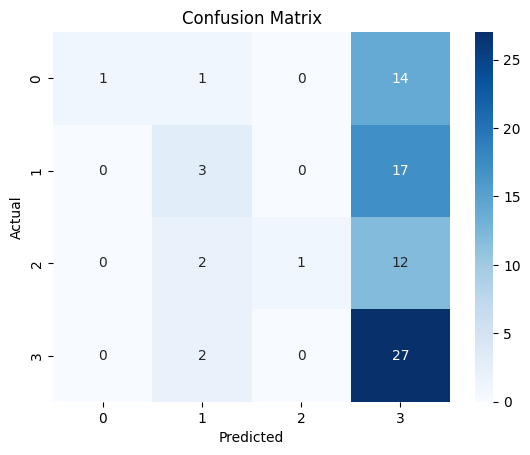

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

EXP2 -- PDP,LRP,GRADCAM,GuidedBackProp,Surrogate Exp

1.PDP

In [25]:
import numpy as np
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier

In [26]:
df=pd.read_csv('Dataset/diabetes.csv')

In [27]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [29]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc)

0.7395833333333334


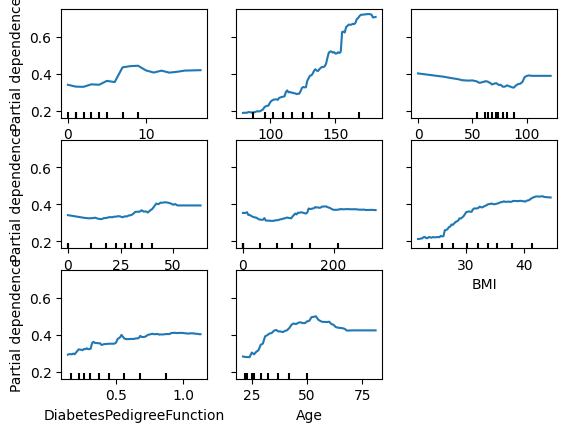

In [32]:
feat = df.columns[:-1]
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=feat)

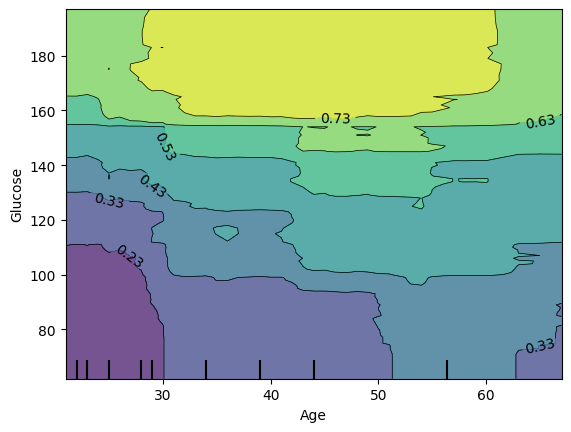

In [31]:

PartialDependenceDisplay.from_estimator(rf_model, X_test, features=[('Age','Glucose')])

In [1]:
import tensorflow as tf

GRADCAM

In [44]:
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Input
from tensorflow.keras.models import Model

In [45]:
!python --version

Python 3.10.9


In [46]:
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam import Gradcam
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [47]:

def build_cnn(inp_shape=(224,224,3),num_cls=2):
    inp=Input(shape=inp_shape)
    x=Conv2D(16,(3,3),activation='relu')(inp)
    x=MaxPool2D((2,2))(x)
    x=Conv2D(32,(3,3),activation='relu')(x)
    x=MaxPool2D((2,2))(x)
    x=Conv2D(32,(3,3),activation='relu')(x)
    x=MaxPool2D((2,2))(x)
    x=Flatten()(x)
    x=Dense(64,activation='relu')(x)
    outputs=Dense(num_cls,activation='softmax')(x)
    model=Model(inputs=inp,outputs=outputs)
    return model

model = build_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
img_path = 'Dataset/lion.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

# 4. Apply Grad-CAM
pred_class = np.argmax(model.predict(img_input))
score = CategoricalScore([pred_class])
gm = Gradcam(model, model_modifier=ReplaceToLinear())
cam = gm(score, img_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


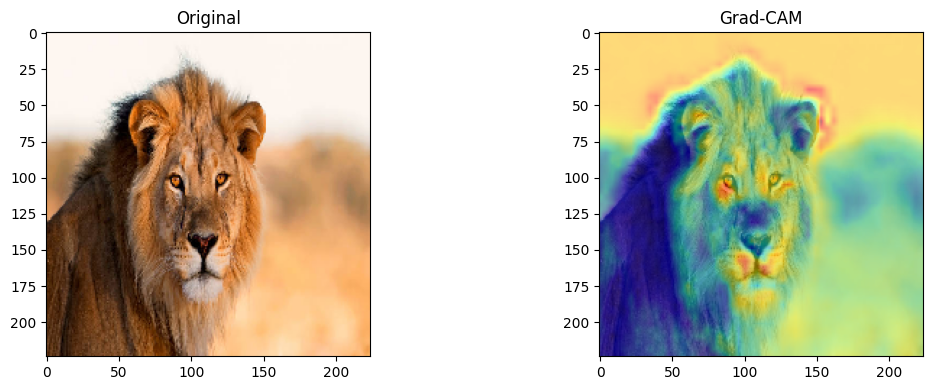

In [49]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(img_array)
ax[1].imshow(cam[0], cmap='jet', alpha=0.5)
ax[1].set_title("Grad-CAM")
plt.tight_layout()
plt.show()

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Your CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'cats_dogs',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'cats_dogs',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 107 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=val_generator, epochs=5)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5847 - loss: 1.5444 - val_accuracy: 0.4615 - val_loss: 0.7208
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 0.4407 - loss: 0.7180 - val_accuracy: 0.5385 - val_loss: 0.6937
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 724ms/step - accuracy: 0.6068 - loss: 0.6851 - val_accuracy: 0.5385 - val_loss: 0.6934
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step - accuracy: 0.5950 - loss: 0.6668 - val_accuracy: 0.4231 - val_loss: 0.6988
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 616ms/step - accuracy: 0.6722 - loss: 0.6592 - val_accuracy: 0.5385 - val_loss: 0.7375


In [54]:
# Get one image
# sample_image, label = next(val_generator)
# img = sample_image[0]  # Shape: (150, 150, 3)
# img_batch = np.expand_dims(img, axis=0)
from tensorflow.keras.preprocessing.image import load_img,img_to_array
img=load_img('Dataset/CAT.jpg',target_size=(150,150))
img=img_to_array(img)/255.0
img_batch=np.expand_dims(img,axis=0)

SALIENCY MAP

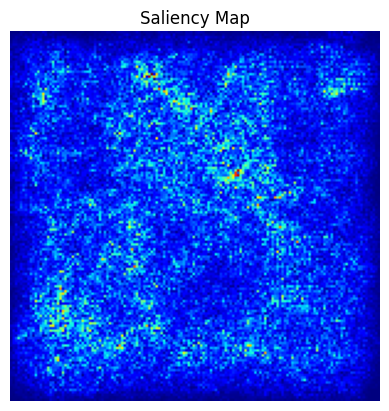

In [55]:
img_tensor = tf.convert_to_tensor(img_batch)
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    pred = model(img_tensor)
    loss = pred[0]

grads = tape.gradient(loss, img_tensor)[0].numpy()
saliency = np.max(np.abs(grads), axis=-1)

plt.imshow(saliency, cmap='jet')
plt.title("Saliency Map")
plt.axis('off')
plt.show()


LRP

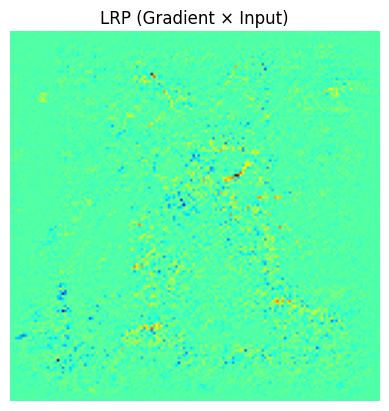

In [64]:
# Basic LRP: treat gradient * input as relevance
with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_batch)
    tape.watch(img_tensor)
    preds = model(img_tensor)
    loss = preds[0]

grads = tape.gradient(loss, img_tensor)[0].numpy()
relevance = grads * img

lrp_map = np.sum(relevance, axis=-1)
plt.imshow(lrp_map, cmap='jet')
plt.title("LRP (Gradient × Input)")
plt.axis('off')
plt.show()

GUIDED BACKPROPAGATION

SURROGATE EXPLAINER

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
df=pd.read_csv('Dataset/diabetes.csv')

In [12]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [13]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [19]:
rf_model=RandomForestClassifier()
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf_model.fit(X_train,y_train)

y_pred=rf_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7402597402597403


In [21]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_test,y_pred)

DecisionTreeClassifier()

[Text(0.5394736842105263, 0.9444444444444444, 'Glucose <= 142.5\ngini = 0.459\nsamples = 154\nvalue = [99.0, 55.0]\nclass = Diabetes'),
 Text(0.2894736842105263, 0.8333333333333334, 'Age <= 35.5\ngini = 0.234\nsamples = 111\nvalue = [96, 15]\nclass = Diabetes'),
 Text(0.4144736842105263, 0.8888888888888888, 'True  '),
 Text(0.15789473684210525, 0.7222222222222222, 'BloodPressure <= 24.0\ngini = 0.053\nsamples = 73\nvalue = [71, 2]\nclass = Diabetes'),
 Text(0.10526315789473684, 0.6111111111111112, 'BMI <= 17.65\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Diabetes'),
 Text(0.05263157894736842, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Diabetes'),
 Text(0.15789473684210525, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = No Diabetes'),
 Text(0.21052631578947367, 0.6111111111111112, 'gini = 0.0\nsamples = 67\nvalue = [67, 0]\nclass = Diabetes'),
 Text(0.42105263157894735, 0.7222222222222222, 'Glucose <= 105.5\ngini = 0.45\nsamples = 38\nvalue = [25, 13]\nclass 

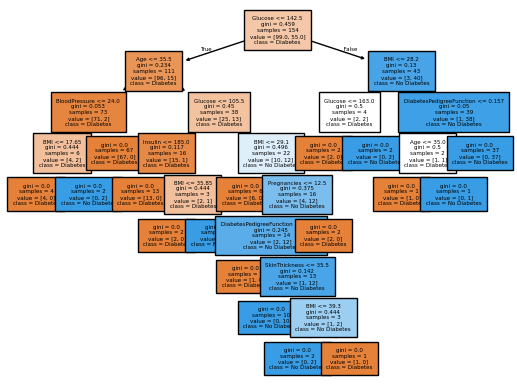

In [32]:
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Diabetes','No Diabetes'],
          filled=True,
          fontsize=4
         )

EXP-4 FEATURE IMPORTANCE

In [33]:
df=pd.read_csv('Dataset/diabetes.csv')

In [35]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

<BarContainer object of 8 artists>

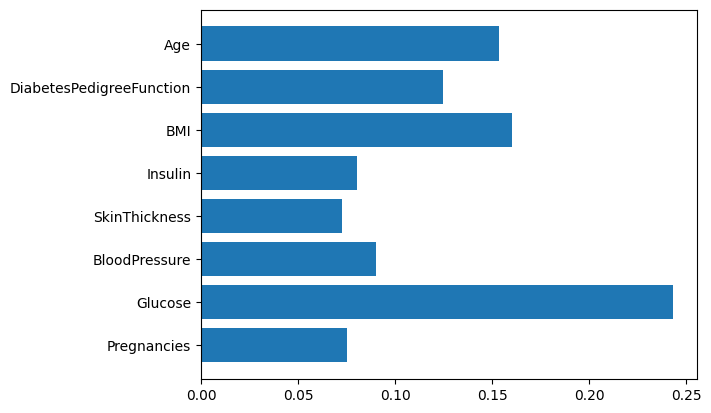

In [43]:
import matplotlib.pyplot as plt

y_pred=model.predict(X_test)

feat_imp=model.feature_importances_
feat=X.columns
plt.barh(feat,feat_imp)

EXP4 - CFE

In [46]:
import dice_ml
from dice_ml import Dice

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
train_df=pd.concat([X_train,y_train],axis=1)

#Need to take all columns which are having int64,float64
cont_feat=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
d=dice_ml.Data(dataframe=train_df,
               continuous_features=cont_feat,
               outcome_name='Outcome')

m=dice_ml.Model(model=model,backend='sklearn')

exp=Dice(d,m)

query=X_test.iloc[2:3]

cf=exp.generate_counterfactuals(query,total_CFs=3,desired_class='opposite')
cf.visualize_as_dataframe()


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.16it/s]

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            2      108             64              0        0  30.799999   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.158   21        0


Diverse Counterfactual set (new outcome: 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      123             64              0        0  30.8   
1            2      179             64             39        0  30.8   
2            2      156             64              0        0  30.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.158   46        1  
1                     0.158   21        1  
2                     0.158   78        1

EXP6 - LIME 

LIME - TABULAR DATA

In [8]:
import lime
import pandas as pd
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df=pd.read_csv('Dataset/diabetes.csv')

In [9]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [10]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



In [22]:
lime_exp=lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Diabetes','No Diabetes'],
    mode='classification'
)

exp=lime_exp.explain_instance(X_test.iloc[0].values,model.predict_proba)
exp.show_in_notebook()

D:\SEM6\XAI_LAB_REQ\xai_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME - TEXT DATA

In [16]:
import lime 
import lime.lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd
df=pd.read_csv('Dataset/sms.tsv',sep='\t',names=['senti','Desc'])

In [17]:
df.head()

senti                                               Desc
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [18]:
df['senti'].map({'ham':1,'spam':0})

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: senti, Length: 5572, dtype: int64

In [19]:
df.head()
df.dropna(inplace=True)

In [76]:
X=df['Desc']
y=df['senti']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

tfidf=TfidfVectorizer()
model=LogisticRegression()
mod_pip=make_pipeline(tfidf,model)
mod_pip.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [78]:
lime_exp=lime.lime_text.LimeTextExplainer(class_names=['Positive','Negative'])
query=X_train.iloc[5]
exp=lime_exp.explain_instance(
    query,
    mod_pip.predict_proba,
)
exp.show_in_notebook()
    

    

LIME - ON IMAGE

In [1]:
import tensorflow as tf

In [2]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

D:\SEM6\XAI_LAB_REQ\xai_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.003921569..1.0].


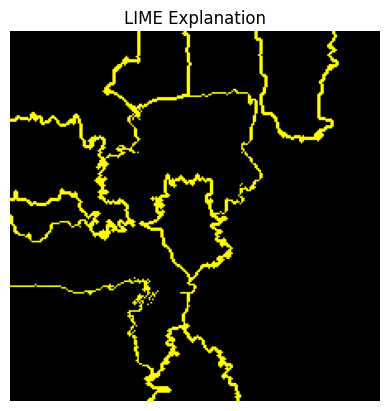

In [3]:
#model = load_model('EffcientNet.h5') 
# Assume trained on cats vs dogs

# Your CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

img_path = 'Dataset/cats_dogs/cats/cat.1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_preprocessed = preprocess_input(np.expand_dims(img_array, axis=0))

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=img_array,
    classifier_fn=lambda x: model.predict(preprocess_input(x)),
    top_labels=2,
    hide_color=0,
    num_samples=10
)

# Show explanation for top label
temp,mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=False,
    hide_rest=False,
    num_features=10,
    min_weight=0.0
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title('LIME Explanation')
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.94509804].


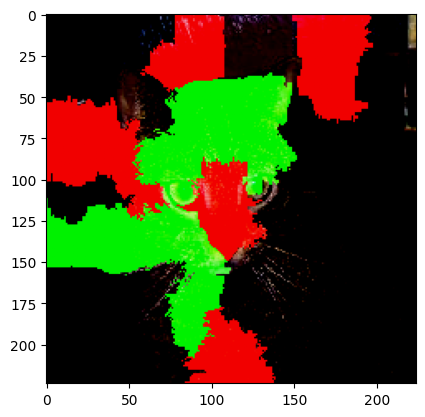

In [4]:
plt.imshow(temp)

SHAP ON DL MODELS

In [45]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet,VGG16
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


D:\SEM6\XAI_LAB_REQ\xai_env\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_427
Received: inputs=['Tensor(shape=(1, 224, 224, 3))']
  warnings.warn(msg)
D:\SEM6\XAI_LAB_REQ\xai_env\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_427
Received: inputs=['Tensor(shape=(50, 224, 224, 3))']
  warnings.warn(msg)


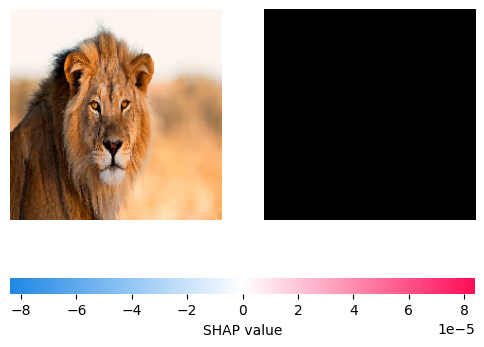

In [62]:
#OWN DL MODEL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Your CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(2, activation='sigmoid')
])


img_path = 'Dataset/lion.jpg'  # change this path
img = load_img(img_path, target_size=(224,224))
img_array = img_to_array(img)
img_preprocessed = np.expand_dims(img_array, axis=0)/255.0

# Show top predicted class
preds = model.predict(img_preprocessed)

background = np.random.rand(10, 224, 224, 3) 

# Use GradientExplainer (only accepts NumPy arrays!)
explainer = shap.GradientExplainer(model, background)

# Compute SHAP values for the top predicted class
# Note: ranked_outputs=1 returns SHAP for top class only
shap_values, indexes = explainer.shap_values(
    img_preprocessed,
    ranked_outputs=2
)

# Plot SHAP values
shap.image_plot(shap_values, img_preprocessed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


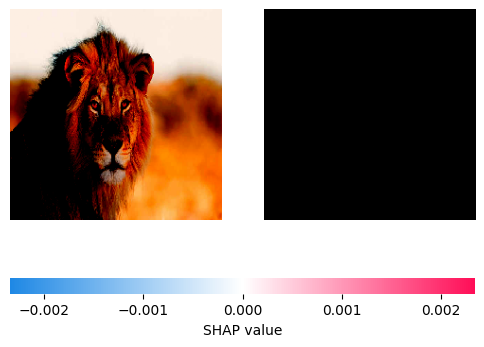

In [64]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet,VGG16
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the model
#model = Mobilenet(weights='imagenet')
model=load_model('mobilenet_model.h5')
# Load and preprocess image
img_path = 'Dataset/lion.jpg'  # change this path
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_preprocessed = preprocess_input(np.expand_dims(img_array, axis=0))

# Show top predicted class
preds = model.predict(img_preprocessed)
# top_pred = decode_predictions(preds, top=3)[0]
# print(top_pred)
# print(f"Predicted: {top_pred[0][1]} ({top_pred[0][2]*100:.2f}%)")

# Background: use multiple zeros or random images for better explanations
background = np.random.rand(10, 224, 224, 3)  # try random sampled ones for better result

# Use GradientExplainer (only accepts NumPy arrays!)
explainer = shap.GradientExplainer(model, background)

# Compute SHAP values for the top predicted class
# Note: ranked_outputs=1 returns SHAP for top class only
shap_values, indexes = explainer.shap_values(
    img_preprocessed,
    ranked_outputs=2
)

# Plot SHAP values
shap.image_plot(shap_values, img_preprocessed)


EXP8 - TRAnSFORMERS

In [77]:
import shap
import numpy as np
from transformers import pipeline, AutoTokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = 'distilbert-base-uncased-finetuned-sst-2-english'

# Download and cache model/tokenizer locally
AutoTokenizer.from_pretrained(model_name)
AutoModelForSequenceClassification.from_pretrained(model_name)
from transformers import pipeline, AutoTokenizer

# Download and cache model + tokenizer
pipeline("text-classification", model="distilbert-base-uncased")
AutoTokenizer.from_pretrained("distilbert-base-uncased")



config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

D:\SEM6\XAI_LAB_REQ\xai_env\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sukhe\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [83]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import shap

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline("sentiment-analysis", model=model_name)
explainer = shap.Explainer(classifier)

shap_values = explainer(["I love using SHAP with transformers"])
shap.plots.text(shap_values)

Device set to use cpu
